In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [2]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './code_03_model_result/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './code_03_model_result/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=30, batch_size=200, 
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])

print("\n👉 Test Accuracy : %.4f" %(model.evaluate(X_test, Y_test)[1]))


Epoch 1: val_loss improved from inf to 0.06021, saving model to ./code_03_model_result\01-0.0602.hdf5

Epoch 2: val_loss improved from 0.06021 to 0.04126, saving model to ./code_03_model_result\02-0.0413.hdf5

Epoch 3: val_loss improved from 0.04126 to 0.03780, saving model to ./code_03_model_result\03-0.0378.hdf5

Epoch 4: val_loss improved from 0.03780 to 0.03261, saving model to ./code_03_model_result\04-0.0326.hdf5

Epoch 5: val_loss did not improve from 0.03261

Epoch 6: val_loss improved from 0.03261 to 0.02736, saving model to ./code_03_model_result\06-0.0274.hdf5

Epoch 7: val_loss improved from 0.02736 to 0.02670, saving model to ./code_03_model_result\07-0.0267.hdf5

Epoch 8: val_loss did not improve from 0.02670

Epoch 9: val_loss did not improve from 0.02670

Epoch 10: val_loss did not improve from 0.02670

Epoch 11: val_loss did not improve from 0.02670

Epoch 12: val_loss did not improve from 0.02670

Epoch 13: val_loss did not improve from 0.02670

Epoch 14: val_loss di

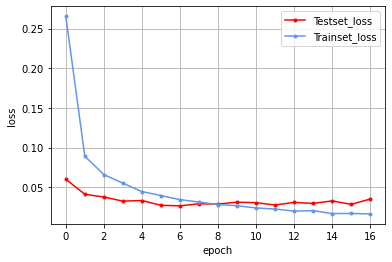

In [3]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='cornflowerblue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()